#Particle Swarm Optimization (PSO) Algorithm

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

Introduction to Particle Swarm Optimization
Particle Swarm Optimization (PSO) is a computational method that optimizes a problem by iteratively trying to improve a candidate solution with regard to a given measure of quality. It solves a problem by having a population of candidate solutions (particles), and moving these particles around in the search-space according to simple mathematical formulae over the particle's position and velocity.

Problem Definition
We'll implement PSO to minimize the following 3D quadratic function:

\
**f(x, y, z) = (x - 4)^2 + (y - 5)^2 + (z + 6)^2**

\

The known global minimum is at [4, 5, -6] with a cost of 0.

In [2]:
# Define the objective function
def objective_function(params):
    """
    Computes the objective function value for given parameters.

    Parameters:
    params : numpy.ndarray
        Array of shape (n_particles, 3) containing particle positions

    Returns:
    numpy.ndarray
        Array of shape (n_particles,) containing cost for each particle
    """
    return (params[:, 0] - 4)**2 + (params[:, 1] - 5)**2 + (params[:, 2] + 6)**2

# Define the bounds of the search space
bounds = np.array([[-10, -10, -10],  # Lower bounds for x, y, z
                   [10, 10, 10]])    # Upper bounds for x, y, z

PSO Algorithm Parameters

Key parameters controlling the PSO algorithm:

- n_particles: Number of particles in the swarm

- max_iterations: Maximum number of iterations

- w: Inertia weight (controls momentum)

- c1: Cognitive acceleration coefficient (personal best influence)

- c2: Social acceleration coefficient (global best influence)

In [3]:
# Define PSO parameters
n_particles = 10     # Number of particles in the swarm
max_iterations = 30   # Maximum number of iterations

w = 0.5   # Inertia weight
c1 = 0.8  # Cognitive acceleration coefficient
c2 = 0.9  # Social acceleration coefficient

Initialization Phase

Initialize particle positions and velocities:

- Particles are randomly distributed within the search space bounds

- Velocities are initialized to zero

- Personal best positions are set to initial positions

- Global best is found from initial population

In [4]:
# Initialize particles and velocities
particles = bounds[0] + np.random.rand(n_particles, 3) * (bounds[1] - bounds[0])
velocities = np.zeros((n_particles, 3))

# Initialize personal best positions and costs
p_best_positions = particles.copy()
best_costs = objective_function(particles)

# Initialize global best position and cost
g_best_idx = np.argmin(best_costs)
g_best_position = p_best_positions[g_best_idx].copy()
global_best_cost = best_costs[g_best_idx]

print(f"Initial global best cost: {global_best_cost:.6f}")
print(f"Initial global best position: {g_best_position}")

Initial global best cost: 24.295723
Initial global best position: [-0.87860032  5.70351923 -6.00652436]


Optimization Loop

The main PSO algorithm consists of:

    1-Velocity update (cognitive + social components)

    2-Position update

    3-Boundary enforcement

    4-Cost evaluation

    5-Best positions update

In [5]:
# Prepare to store convergence history for visualization
cost_history = []

# Perform the optimization
for iteration in range(max_iterations):
    # Generate random numbers for stochastic components
    r1 = np.random.rand(n_particles, 3)
    r2 = np.random.rand(n_particles, 3)

    # Calculate cognitive and social components
    cognitive_component = c1 * r1 * (p_best_positions - particles)
    social_component = c2 * r2 * (g_best_position - particles)

    # Update velocities (inertia + cognitive + social)
    velocities = w * velocities + cognitive_component + social_component

    # Update particle positions
    particles = particles + velocities

    # Enforce search space bounds
    particles = np.maximum(particles, bounds[0])
    particles = np.minimum(particles, bounds[1])

    # Evaluate current positions
    costs = objective_function(particles)

    # Update personal best positions and costs
    improved_indices = costs < best_costs
    p_best_positions[improved_indices] = particles[improved_indices]
    best_costs[improved_indices] = costs[improved_indices]

    # Update global best position and cost
    current_best_idx = np.argmin(best_costs)
    if best_costs[current_best_idx] < global_best_cost:
        g_best_position = p_best_positions[current_best_idx].copy()
        global_best_cost = best_costs[current_best_idx]

    # Store convergence history
    cost_history.append(global_best_cost)

    # Print progress
    print(f"Iteration {iteration + 1}: Best Cost = {global_best_cost:.6f}")

# Print final results
print("\nOptimization complete!")
print(f"Global Best Position: [{g_best_position[0]:.6f}, {g_best_position[1]:.6f}, {g_best_position[2]:.6f}]")
print(f"Global Best Cost: {global_best_cost:.6f}")

Iteration 1: Best Cost = 12.336995
Iteration 2: Best Cost = 4.762195
Iteration 3: Best Cost = 1.855784
Iteration 4: Best Cost = 0.469253
Iteration 5: Best Cost = 0.337561
Iteration 6: Best Cost = 0.320771
Iteration 7: Best Cost = 0.128297
Iteration 8: Best Cost = 0.128297
Iteration 9: Best Cost = 0.128297
Iteration 10: Best Cost = 0.077644
Iteration 11: Best Cost = 0.012528
Iteration 12: Best Cost = 0.009377
Iteration 13: Best Cost = 0.004060
Iteration 14: Best Cost = 0.000987
Iteration 15: Best Cost = 0.000987
Iteration 16: Best Cost = 0.000675
Iteration 17: Best Cost = 0.000487
Iteration 18: Best Cost = 0.000487
Iteration 19: Best Cost = 0.000187
Iteration 20: Best Cost = 0.000146
Iteration 21: Best Cost = 0.000041
Iteration 22: Best Cost = 0.000039
Iteration 23: Best Cost = 0.000024
Iteration 24: Best Cost = 0.000018
Iteration 25: Best Cost = 0.000001
Iteration 26: Best Cost = 0.000001
Iteration 27: Best Cost = 0.000001
Iteration 28: Best Cost = 0.000001
Iteration 29: Best Cost = 0.

Visualization of Results

Visualize the convergence of the algorithm and the final particle distribution.

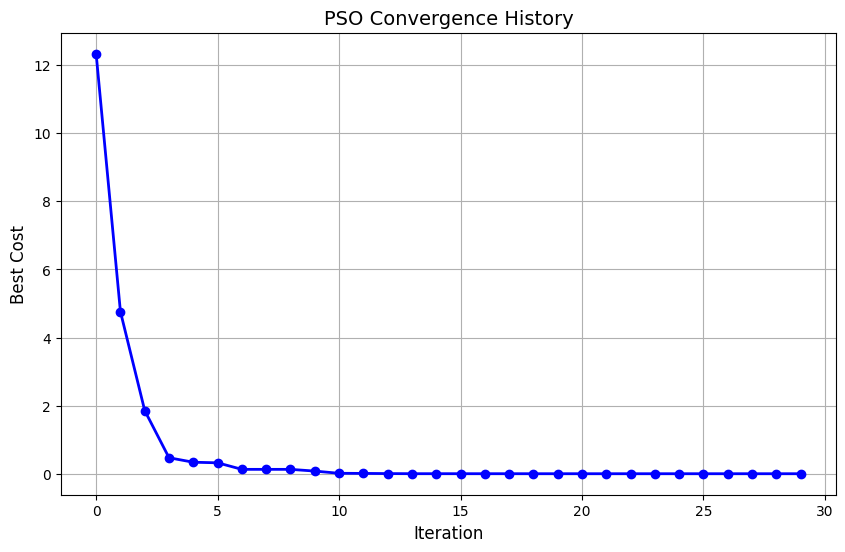

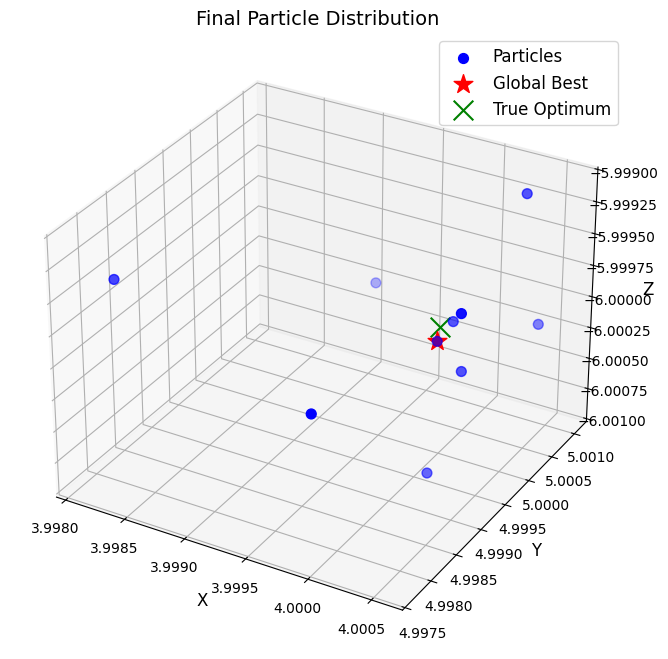

In [6]:
# Plot convergence history
plt.figure(figsize=(10, 6))
plt.plot(cost_history, 'b-o', linewidth=2)
plt.title('PSO Convergence History', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Best Cost', fontsize=12)
plt.grid(True)
plt.show()

# Create 3D plot of final particle positions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot particles
ax.scatter(particles[:, 0], particles[:, 1], particles[:, 2],
           c='b', marker='o', s=50, label='Particles')

# Plot global best
ax.scatter(g_best_position[0], g_best_position[1], g_best_position[2],
           c='r', marker='*', s=200, label='Global Best')

# Plot true optimum
ax.scatter(4, 5, -6, c='g', marker='x', s=200, label='True Optimum')

# Set labels and title
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('Final Particle Distribution', fontsize=14)
ax.legend(fontsize=12)

plt.show()

In [9]:
# Additional utility: Function to run PSO with different parameters
def run_pso(n_particles=10, max_iter=30, w=0.5, c1=0.8, c2=0.9, bounds=None, obj_func=None):
    """
    Complete PSO implementation as a reusable function.

    Parameters:
    - n_particles: Number of particles
    - max_iter: Maximum iterations
    - w: Inertia weight
    - c1: Cognitive coefficient
    - c2: Social coefficient
    - bounds: Search space bounds
    - obj_func: Objective function

    Returns:
    - g_best_position: Best found solution
    - global_best_cost: Best found cost
    - cost_history: Array of best costs per iteration
    """
    if bounds is None:
        bounds = np.array([[-10, -10, -10], [10, 10, 10]])
    if obj_func is None:
        obj_func = objective_function

    # Initialize particles and velocities
    particles = bounds[0] + np.random.rand(n_particles, 3) * (bounds[1] - bounds[0])
    velocities = np.zeros((n_particles, 3))

    # Initialize best positions
    p_best_positions = particles.copy()
    best_costs = obj_func(particles)
    g_best_idx = np.argmin(best_costs)
    g_best_position = p_best_positions[g_best_idx].copy()
    global_best_cost = best_costs[g_best_idx]

    cost_history = []

    for iteration in range(max_iter):
        r1 = np.random.rand(n_particles, 3)
        r2 = np.random.rand(n_particles, 3)

        cognitive_component = c1 * r1 * (p_best_positions - particles)
        social_component = c2 * r2 * (g_best_position - particles)

        velocities = w * velocities + cognitive_component + social_component
        particles = particles + velocities

        particles = np.maximum(particles, bounds[0])
        particles = np.minimum(particles, bounds[1])

        costs = obj_func(particles)

        improved_indices = costs < best_costs
        p_best_positions[improved_indices] = particles[improved_indices]
        best_costs[improved_indices] = costs[improved_indices]

        current_best_idx = np.argmin(best_costs)
        if best_costs[current_best_idx] < global_best_cost:
            g_best_position = p_best_positions[current_best_idx].copy()
            global_best_cost = best_costs[current_best_idx]

        cost_history.append(global_best_cost)

    return g_best_position, global_best_cost, cost_history

# Example usage:
best_pos, best_cost, history = run_pso(n_particles=20, max_iter=50, w=0.7)

In [10]:
best_pos, best_cost, history


(array([ 4.00008619,  5.0000764 , -6.0000068 ]),
 np.float64(1.3312237418635507e-08),
 [np.float64(1.8192654713195795),
  np.float64(1.8192654713195795),
  np.float64(1.8192654713195795),
  np.float64(1.8192654713195795),
  np.float64(0.21162713591616544),
  np.float64(0.11381859405476151),
  np.float64(0.04045135854596462),
  np.float64(0.03714991238947711),
  np.float64(0.03714991238947711),
  np.float64(0.03714991238947711),
  np.float64(0.012920201693363411),
  np.float64(0.004658807182846936),
  np.float64(0.004466449621710974),
  np.float64(0.004466449621710974),
  np.float64(0.004466449621710974),
  np.float64(0.0008859727384475125),
  np.float64(0.0008859727384475125),
  np.float64(0.0008859727384475125),
  np.float64(0.0008859727384475125),
  np.float64(0.0003464680302252166),
  np.float64(0.0003464680302252166),
  np.float64(0.0003464680302252166),
  np.float64(0.0003464680302252166),
  np.float64(0.0003359672207191669),
  np.float64(0.0002891266804115206),
  np.float64(0.000